In [66]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [67]:
df=pd.read_csv("Iris.csv")
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [68]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [69]:
df.shape

(150, 6)

In [70]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [71]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [72]:
df.values

array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [75]:
X=df.iloc[:,:4]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [76]:
y=df.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [77]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 ],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 ],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 ]])

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
y_test.shape

(45,)

In [79]:
knnmodel=KNeighborsClassifier(n_neighbors=3)

In [80]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
y_predict1=knnmodel.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
acc=accuracy_score(y_test,y_predict1)
acc

1.0

In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]], dtype=int64)

In [85]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,18,0
virginica,0,0,13


In [86]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [94]:
prediction_output.transpose()

,y_test,y_predict1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [88]:
prediction_output.iloc[0,:].value_counts()

Iris-versicolor    18
Iris-setosa        14
Iris-virginica     13
Name: y_test, dtype: int64

In [89]:
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [90]:
print(mean_acc)

[1.         0.97777778 1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.97777778
 1.         0.97777778 0.97777778 0.97777778 1.         1.
 1.         1.         1.         0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.95555556 0.95555556 0.93333333 0.93333333 0.93333333 0.93333333
 0.88888889]


In [91]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


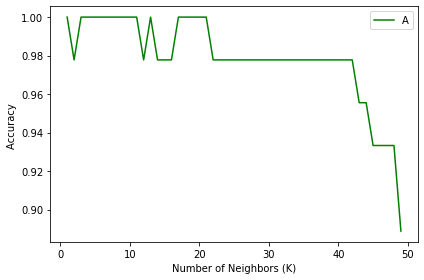

In [92]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()